In [1]:
!pip install openpyxl shap # probatus

ERROR: Invalid requirement: '#'

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Description 
This dataset contains data about 150 couples with their corresponding Divorce Predictors Scale variables (DPS) on the basis of Gottman couples therapy.
The couples are from various regions of Turkey wherein the records were acquired from face-to-face interviews from couples who were already divorced or happily married.
All responses were collected on a 5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always).

# Read data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import plot_tree


# importing libs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model
import tensorflow.keras.metrics as metrics
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# import data
headers_frame = pd.read_csv("./reference.tsv",sep="|")
headers = list(headers_frame["description"])
headers.append("Class")
df = pd.read_excel("./divorce.xlsx",names=headers)

# Data/correlation analysis

In [3]:
#len(pd.read_excel("./divorce.xlsx").columns)

In [4]:
df

,"If one of us apologizes when our discussion deteriorates, the discussion ends.","I know we can ignore our differences, even if things get hard sometimes.","When we need it, we can take our discussions with my spouse from the beginning and correct it.","When I discuss with my spouse, to contact him will eventually work.",The time I spent with my wife is special for us.,We don't have time at home as partners.,We are like two strangers who share the same environment at home rather than family.,I enjoy our holidays with my wife.,I enjoy traveling with my wife.,Most of our goals are common to my spouse.,...,"Even if I'm right in the discussion, I stay silent to hurt my spouse.","When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.",I feel right in our discussions.,I have nothing to do with what I've been accused of.,I'm not actually the one who's guilty about what I'm accused of.,I'm not the one who's wrong about problems at home.,I wouldn't hesitate to tell my spouse about her/his inadequacy.,"When I discuss, I remind my spouse of her/his inadequacy.",I'm not afraid to tell my spouse about her/his incompetence.,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [5]:
len(df.columns)

55

In [6]:
df.columns

Index(['If one of us apologizes when our discussion deteriorates, the discussion ends.',
       'I know we can ignore our differences, even if things get hard sometimes.',
       'When we need it, we can take our discussions with my spouse from the beginning and correct it.',
       'When I discuss with my spouse, to contact him will eventually work.',
       'The time I spent with my wife is special for us.',
       'We don't have time at home as partners.',
       'We are like two strangers who share the same environment at home rather than family.',
       'I enjoy our holidays with my wife.', 'I enjoy traveling with my wife.',
       'Most of our goals are common to my spouse.',
       'I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.',
       'My spouse and I have similar values in terms of personal freedom.',
       'My spouse and I have similar sense of entertainment.',
       'Most of our goals for people (ch

In [7]:
df.isna().sum()

If one of us apologizes when our discussion deteriorates, the discussion ends.                                            0
I know we can ignore our differences, even if things get hard sometimes.                                                  0
When we need it, we can take our discussions with my spouse from the beginning and correct it.                            0
When I discuss with my spouse, to contact him will eventually work.                                                       0
The time I spent with my wife is special for us.                                                                          0
We don't have time at home as partners.                                                                                   0
We are like two strangers who share the same environment at home rather than family.                                      0
I enjoy our holidays with my wife.                                                                                        0
I enjoy 

In [8]:
print(df.describe())

       If one of us apologizes when our discussion deteriorates, the discussion ends.  \
count                                         170.000000                                
mean                                            1.776471                                
std                                             1.627257                                
min                                             0.000000                                
25%                                             0.000000                                
50%                                             2.000000                                
75%                                             3.000000                                
max                                             4.000000                                

       I know we can ignore our differences, even if things get hard sometimes.  \
count                                         170.000000                          
mean                            

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype
---  ------                                                                                                                  --------------  -----
 0   If one of us apologizes when our discussion deteriorates, the discussion ends.                                          170 non-null    int64
 1   I know we can ignore our differences, even if things get hard sometimes.                                                170 non-null    int64
 2   When we need it, we can take our discussions with my spouse from the beginning and correct it.                          170 non-null    int64
 3   When I discuss with my spouse, to contact him will eventually work.                                                     170 non-null    int64
 4   The time

In [10]:
df.corr()

,"If one of us apologizes when our discussion deteriorates, the discussion ends.","I know we can ignore our differences, even if things get hard sometimes.","When we need it, we can take our discussions with my spouse from the beginning and correct it.","When I discuss with my spouse, to contact him will eventually work.",The time I spent with my wife is special for us.,We don't have time at home as partners.,We are like two strangers who share the same environment at home rather than family.,I enjoy our holidays with my wife.,I enjoy traveling with my wife.,Most of our goals are common to my spouse.,...,"Even if I'm right in the discussion, I stay silent to hurt my spouse.","When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.",I feel right in our discussions.,I have nothing to do with what I've been accused of.,I'm not actually the one who's guilty about what I'm accused of.,I'm not the one who's wrong about problems at home.,I wouldn't hesitate to tell my spouse about her/his inadequacy.,"When I discuss, I remind my spouse of her/his inadequacy.",I'm not afraid to tell my spouse about her/his incompetence.,Class
"If one of us apologizes when our discussion deteriorates, the discussion ends.",1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
"I know we can ignore our differences, even if things get hard sometimes.",0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
"When we need it, we can take our discussions with my spouse from the beginning and correct it.",0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
"When I discuss with my spouse, to contact him will eventually work.",0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
The time I spent with my wife is special for us.,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
We don't have time at home as partners.,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
We are like two strangers who share the same environment at home rather than family.,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
I enjoy our holidays with my wife.,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
I enjoy traveling with my wife.,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
Most of our goals are common to my spouse.,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


## Plot heatmap

In [11]:
# type = "png"
# plt.figure(figsize = (100,100))
# sns.heatmap(df.corr(), annot=True, center=0, cmap="coolwarm")

# figure = svm.get_figure()    
# figure.savefig("svm_conf4."+type,format=type, dpi=4000)

## Correlation columns

In [12]:
# Get all colums and names
def get_colums(df):
    for coulmn_name in df:
        yield coulmn_name, df[coulmn_name]

In [13]:
# Get correlations with input column and all columns
def get_correlations_with_column(input_column):
    for _, column in get_colums(df):
        yield column, column.corr(input_column) ** 2

In [14]:
# Get it as a dict
def get_correlations_with_column_str(input_column):
    d = {}
    for column, column_corr in get_correlations_with_column(input_column):
        if not column is input_column:
            d[column.name] = column_corr
    return d

## Correlation columns

In [15]:
corrs = get_correlations_with_column_str(df["Class"])
corrs_sorted = sorted(corrs.items(), key=lambda x: x[1], reverse=True)
corrs_sorted

[("We're just starting a discussion before I know what's going on.",
  0.8811269612319931),
 ('We share the same views about being happy in our life with my spouse',
  0.8636840404936236),
 ('My spouse and I have similar ideas about how roles should be in marriage',
  0.8623480761758286),
 ('My spouse and I have similar ideas about how marriage should be',
  0.8523135980754254),
 ('I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.',
  0.8434327678048974),
 ('I enjoy traveling with my wife.', 0.8324157849042061),
 ('My spouse and I have similar values in trust.', 0.8226633198322472),
 ('Our dreams with my spouse are similar and harmonious.', 0.8121968830976817),
 ('Our discussions often occur suddenly.', 0.8031383996954033),
 ('When I talk to my spouse about something, my calm suddenly breaks.',
  0.7998718774334005),
 ('The time I spent with my wife is special for us.', 0.797770200802153),
 ('I know my spouse very wel

In [16]:
for num, corrs in enumerate(corrs_sorted, start=1):
    feature, corr = corrs
    print(f"{num}) {feature} = {corr}")

1) We're just starting a discussion before I know what's going on. = 0.8811269612319931
2) We share the same views about being happy in our life with my spouse = 0.8636840404936236
3) My spouse and I have similar ideas about how roles should be in marriage = 0.8623480761758286
4) My spouse and I have similar ideas about how marriage should be = 0.8523135980754254
5) I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other. = 0.8434327678048974
6) I enjoy traveling with my wife. = 0.8324157849042061
7) My spouse and I have similar values in trust. = 0.8226633198322472
8) Our dreams with my spouse are similar and harmonious. = 0.8121968830976817
9) Our discussions often occur suddenly. = 0.8031383996954033
10) When I talk to my spouse about something, my calm suddenly breaks. = 0.7998718774334005
11) The time I spent with my wife is special for us. = 0.797770200802153
12) I know my spouse very well. = 0.7973665472896043
13) I c

## Select (top-n) features

In [17]:
[x[0] for x in corrs_sorted]

["We're just starting a discussion before I know what's going on.",
 'We share the same views about being happy in our life with my spouse',
 'My spouse and I have similar ideas about how roles should be in marriage',
 'My spouse and I have similar ideas about how marriage should be',
 'I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.',
 'I enjoy traveling with my wife.',
 'My spouse and I have similar values in trust.',
 'Our dreams with my spouse are similar and harmonious.',
 'Our discussions often occur suddenly.',
 'When I talk to my spouse about something, my calm suddenly breaks.',
 'The time I spent with my wife is special for us.',
 'I know my spouse very well.',
 'I can be humiliating when we discussions.',
 "We're compatible with my spouse about what love should be.",
 "I hate my spouse's way of open a subject.",
 "I know my spouse's friends and their social relationships.",
 "I know my spouse's basic anxi

In [18]:
top_selected_features = [x[0] for x in corrs_sorted][:5]

In [19]:
top_selected_features

["We're just starting a discussion before I know what's going on.",
 'We share the same views about being happy in our life with my spouse',
 'My spouse and I have similar ideas about how roles should be in marriage',
 'My spouse and I have similar ideas about how marriage should be',
 'I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.']

In [20]:
"""
customly_selected_features = [
    # "My spouse and I have similar ideas about how roles should be in marriage",
    # "I enjoy traveling with my wife.",
    # "The time I spent with my wife is special for us.",
    "I know my spouse's basic anxieties.",
    "My discussion with my spouse is not calm.",
    "I know my spouse's favorite food.",
    "I know my spouse's friends and their social relationships.",
    "I know what my spouse's current sources of stress are.",
]
"""

customly_selected_features = [
	"My spouse and I have similar ideas about how roles should be in marriage",
	"I enjoy traveling with my wife.",
	"The time I spent with my wife is special for us.",
	"I know my spouse's basic anxieties.",
	"My discussion with my spouse is not calm.",
	"I know my spouse's favorite food.",
	"I know my spouse's friends and their social relationships.",
	"I know what my spouse's current sources of stress are.",
]

print(len(customly_selected_features))
top_selected_features=customly_selected_features

8


In [21]:
y = df["Class"]
X = df[top_selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
X_train

,My spouse and I have similar ideas about how roles should be in marriage,I enjoy traveling with my wife.,The time I spent with my wife is special for us.,I know my spouse's basic anxieties.,My discussion with my spouse is not calm.,I know my spouse's favorite food.,I know my spouse's friends and their social relationships.,I know what my spouse's current sources of stress are.
47,3,2,3,3,4,3,3,2
1,3,4,4,1,3,0,1,2
125,0,0,0,0,1,0,0,0
29,4,3,4,3,4,4,3,3
149,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
46,3,3,3,3,4,3,3,3
142,0,0,0,0,0,0,0,0
116,0,0,0,0,1,0,1,0
108,0,0,0,0,0,0,1,0


In [23]:
y_train

47     1
1      1
125    0
29     1
149    0
      ..
46     1
142    0
116    0
108    0
4      1
Name: Class, Length: 119, dtype: int64

## Scale features

In [24]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# #StandardScaler() will normalize the features i.e. each column of X, INDIVIDUALLY, 
# #so that each column/feature/variable will have μ = 0 and σ = 1.
# standard = StandardScaler() 
# X_train_scaled = standard.fit_transform(X_train)
# X_test_scaled = standard.fit_transform(X_test)

# #X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# #X_scaled = X_std * (max - min) + min
# normalization = MinMaxScaler()
# X_train_normalized = normalization.fit_transform(X_train)
# X_test_normalized = normalization.fit_transform(X_test)

# #Scale features using statistics that are robust to outliers.
# robust = RobustScaler()
# X_train_robust = robust.fit_transform(X_train)
# X_test_robust = robust.fit_transform(X_test)

## Model creation

In [25]:
from time import time
from sklearn import metrics
def benchmark(clf):
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("prediction time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    print("classification report:")
    print(classification_report(y_test, pred))

    y_test_class = np.argmax(y_test, axis=1)
    y_pred_class = np.argmax(pred, axis=1)

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test_class, y_pred_class))

    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

In [26]:
input_shape = (len(X_train.columns),)
metrics = ["accuracy"]

model = Sequential()
model.add(Dense(8, input_shape=input_shape, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(  optimizer=Adam(learning_rate=0.001),
                loss="sparse_categorical_crossentropy", metrics=metrics)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


## Model training

# NN

In [27]:
import time

num_of_epochs = 200

start_time = time.time()
print(f"--- Started trainging: {start_time}")


history = model.fit( X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=200, verbose=3, batch_size=128)

loss, accuracy = model.evaluate(
    X_test, y_test, verbose=0)


end_time = time.time()
training_time = end_time - start_time

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

print(f"--- Ended training: {end_time}")
print(f"--- Training time: {training_time}")
print(f"--- Model accuracy: {accuracy}")
print(f"--- Model loss: {loss}")

--- Started trainging: 1667468157.1069689
Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch

# D-tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from random import randint

# seed = randint(0,1000)
seed = 334
print(f"{seed=}")

dtree = DecisionTreeClassifier(random_state=seed, max_depth=5)
tree_hist = dtree.fit(X_train, y_train)

seed=334


In [29]:
pred = dtree.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print(f"{score=}")

score=1.0


## Plotting results

In [30]:
# plt.plot(num_of_epochs, training_loss, "r--")
# plt.plot(num_of_epochs, test_loss, "b-")
# plt.legend(["Training Loss", "Test Loss"])
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.show()

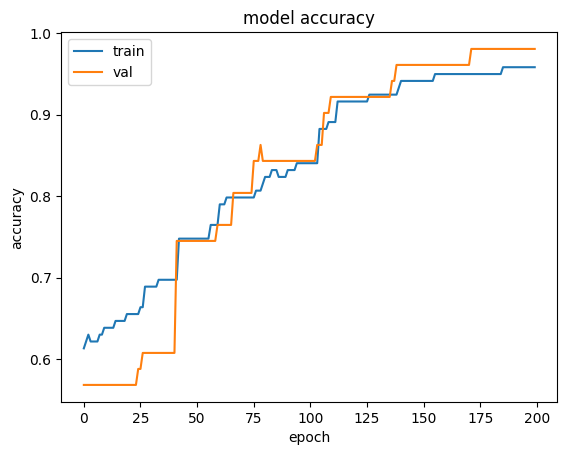

In [31]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

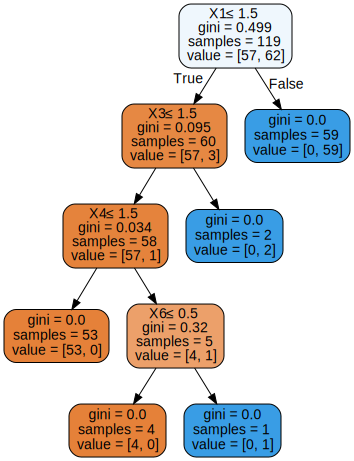

In [32]:
import sklearn, graphviz

dot_data = sklearn.tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Shap

In [33]:
import shap
shap.initjs()

In [34]:
X_importance = X_test

### NN

In [35]:
# explainer = shap.DeepExplainer(model, X_train)
nn_explainer = shap.KernelExplainer(model.predict, X_train)
# nn_shap_interpreter = ShapModelInterpreter(predict)

nn_shap_values = nn_explainer.shap_values(X_test, nsamples=1000)

4/4 [==============================] - 0s 3ms/step


Using 119 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/51 [00:00<?, ?it/s]

945/945 [==============================] - 2s 2ms/step


In [76]:
import matplotlib.pyplot as pl
import matplotlib

cmap = matplotlib.colors.ListedColormap(np.array(["cornflowerblue" for _ in range(2)])[[0, 1]])

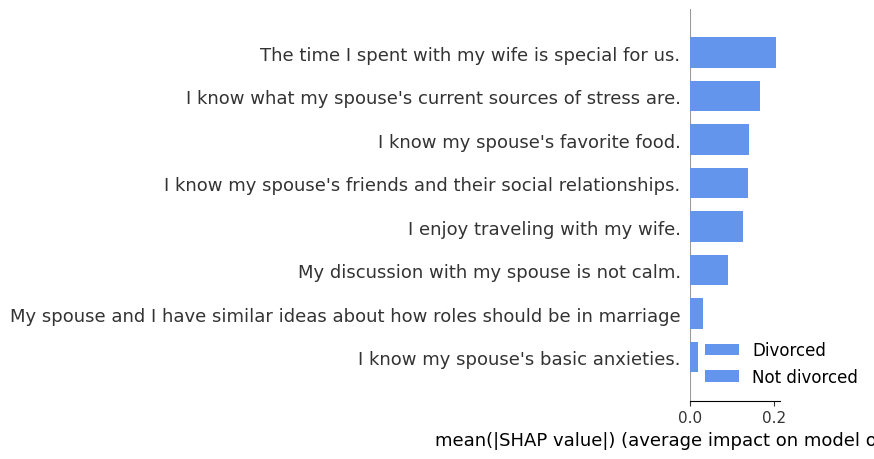

In [77]:
shap.summary_plot(nn_shap_values, X_test, feature_names=top_selected_features,class_names=["Divorced","Not divorced"],class_inds='original',color=cmap)

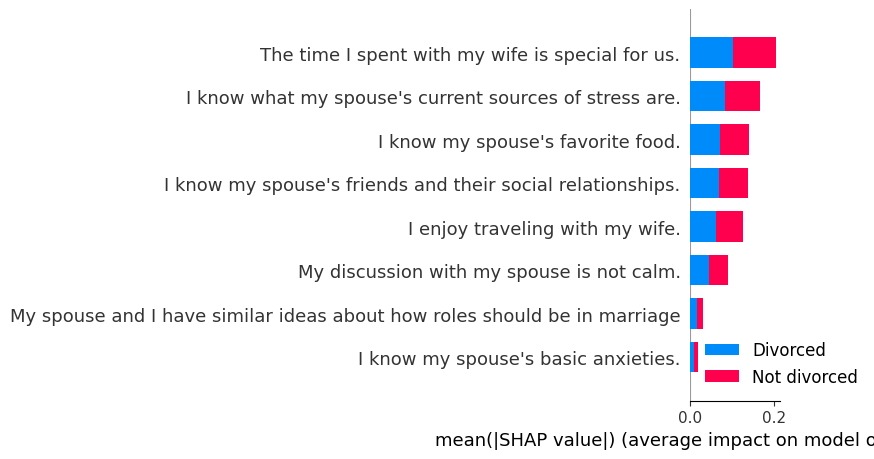

In [65]:
shap.summary_plot(nn_shap_values, X_test, feature_names=top_selected_features,class_names=["Divorced","Not divorced"],class_inds='original')

In [37]:
# from probatus.interpret import ShapModelInterpreter
# shap_interpreter = ShapModelInterpreter(model)

### Dtree

In [38]:
dtree_explainer = shap.TreeExplainer(dtree)
dtree_shap_values = dtree_explainer.shap_values(X_test)

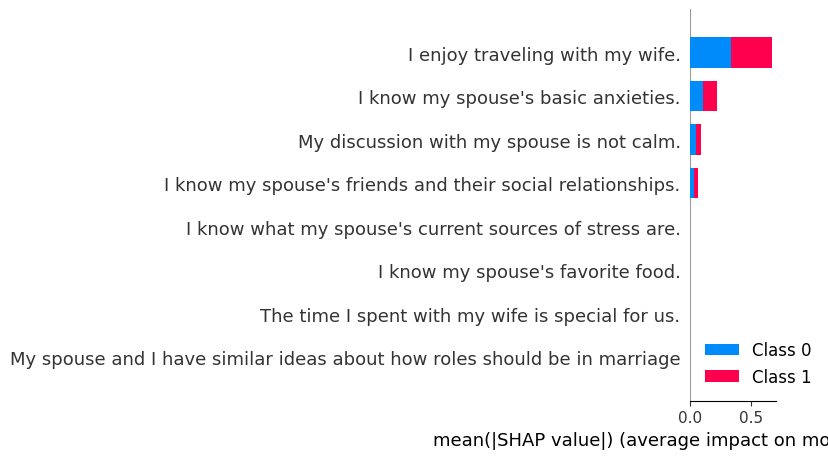

In [39]:
dtree_shap_values = dtree_explainer.shap_values(X_train)
shap.summary_plot(dtree_shap_values,X_train)

In [40]:
# shap_interpreter = ShapModelInterpreter(clf)
# feature_importance = shap_interpreter.fit_compute(X_train, X_test, y_train, y_test, approximate=False)
# feature_importance

In [41]:
from shap import Explainer, Explanation

### Dtree

In [42]:
dtree_explainer = shap.TreeExplainer(dtree)
dtree_shap_values = dtree_explainer.shap_values(X_test)

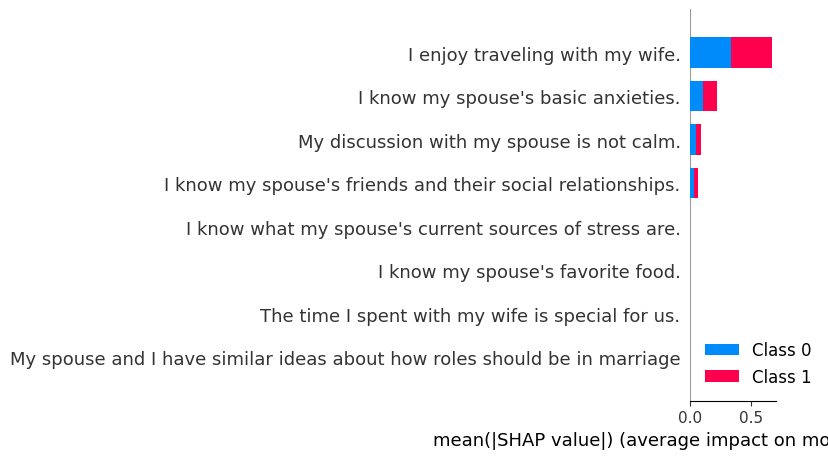

In [43]:
dtree_shap_values = dtree_explainer.shap_values(X_train)
shap.summary_plot(dtree_shap_values,X_train)

In [44]:
# shap_interpreter = ShapModelInterpreter(clf)
# feature_importance = shap_interpreter.fit_compute(X_train, X_test, y_train, y_test, approximate=False)
# feature_importance

In [45]:
from shap import Explainer, Explanation